In [227]:
%matplotlib inline
import re
import time
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import integrate, interpolate
from ipycanvas import Canvas as cvs



In [228]:
motion = pd.read_csv('../data/motion.txt')
ladar = pd.read_csv('../data/Ladar.txt')
length = pd.read_csv('../data/Length.txt')

In [229]:
motion.columns = ['time', 'AX','AY','AZ','GX','GY','GZ','MX','MY','MZ']

stime = motion['time'][0]
stime = time.mktime(datetime.datetime.strptime(stime,"%Y-%m-%d %H:%M:%S").timetuple()) 


motion['time'] = motion['time'].apply(lambda x:time.mktime(datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S").timetuple()) -stime)   
motion['AX'] = motion['AX'].apply(lambda x: float(x.split('=')[1]))
motion['AY'] = motion['AY'].apply(lambda x: float(x.split('=')[1]))
motion['AZ'] = motion['AZ'].apply(lambda x: float(x.split('=')[1]))
motion['GX'] = motion['GX'].apply(lambda x: float(x.split('=')[1]))
motion['GY'] = motion['GY'].apply(lambda x: float(x.split('=')[1]))
motion['GZ'] = motion['GZ'].apply(lambda x: float(x.split('=')[1]))
motion['MX'] = motion['MX'].apply(lambda x: float(x.split('=')[1]))
motion['MY'] = motion['MY'].apply(lambda x: float(x.split('=')[1]))
motion['MZ'] = motion['MZ'].apply(lambda x: float(x.split('=')[1]))


print(motion)

      time        AX        AY        AZ        GX        GY        GZ  \
0      0.0 -0.036746 -0.009221  1.010771  9.156615 -2.104289  2.072721   
1      0.0 -0.036630  0.002915  1.010698  9.129511 -2.136888  2.445539   
2      1.0 -0.040886  0.007324  1.011153  8.861691 -2.337279  1.151054   
3      2.0 -0.034912  0.017311  1.009003  8.931520 -2.211519  2.428211   
4      3.0 -0.041519 -0.028215  1.014184  9.235025 -2.129853  2.938798   
..     ...       ...       ...       ...       ...       ...       ...   
290  170.0 -0.023099 -0.008096  1.010952  8.774704 -2.280490  2.290956   
291  171.0 -0.031647  0.000638  1.011081  8.855345 -2.250981  2.275343   
292  172.0 -0.031025  0.014718  1.010882  8.942500 -2.351691  2.169142   
293  173.0 -0.035156 -0.005605  1.010549  9.104115 -2.182009  2.135686   
294  173.0 -0.037432 -0.010520  1.011296  9.194018 -2.139975  2.056936   

           MX        MY        MZ  
0    0.270461  0.226649 -1.031591  
1    0.267386  0.225507 -1.033960  
2  

In [230]:
x = motion['time']
m11 = motion['AX']
m12 = motion['AY']
m13 = motion['AZ']
m21 = motion['GX']
m22 = motion['GY']
m23 = motion['GZ']
m31 = motion['MX']
m32 = motion['MY']
m33 = motion['MZ']


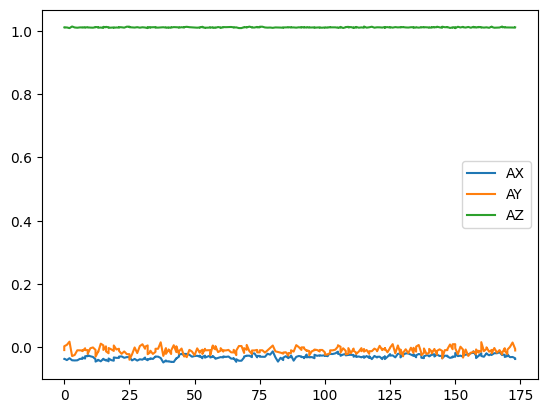

In [231]:
plt.plot(x,m11)
plt.plot(x,m12)
plt.plot(x,m13)
plt.legend(['AX','AY','AZ'])
plt.show()


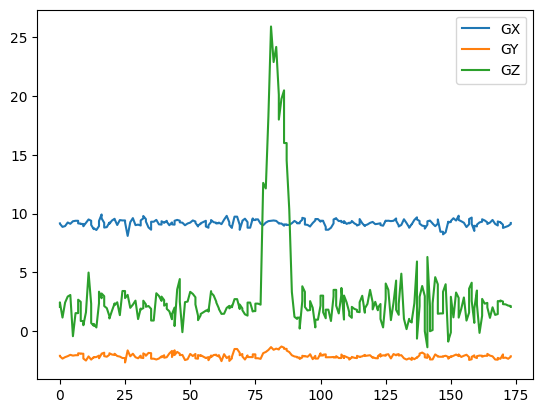

In [232]:
plt.plot(x,m21)
plt.plot(x,m22)
plt.plot(x,m23)
plt.legend(['GX','GY','GZ'])
plt.show()


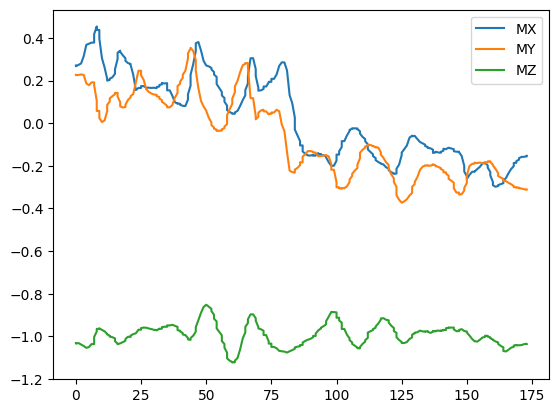

In [233]:
plt.plot(x,m31)
plt.plot(x,m32)
plt.plot(x,m33)
plt.legend(['MX','MY','MZ'])
plt.show()


In [242]:
# print(ladar)

def polygon(canvas, x, y, radius, n_points):
    angles = (2 * math.pi / n_points) * np.arange(n_points)

    v_x = x + np.cos(angles) * radius
    v_y = y + np.sin(angles) * radius

    points = np.stack((v_x, v_y), axis=1)

    canvas.fill_polygon(points)

cv = cvs(width=800, height=800)
cv.font = '20px sans-serif'
cv.fill_style = 'blue'
cv.fill_text('Ladar', 100, 200)
polygon(cv,100,100,100,5)
cv


In [235]:
print(length.head())    

   2024-03-22 11:27:48  Front:23241mm   Back:2833mm   Up:693mm   Left:1783mm  \
0  2024-03-22 11:27:49  Front:23241mm   Back:2834mm   Up:694mm   Left:1783mm   
1  2024-03-22 11:27:49  Front:23240mm   Back:2834mm   Up:693mm   Left:1783mm   
2  2024-03-22 11:27:50  Front:23240mm   Back:2835mm   Up:693mm   Left:1783mm   
3  2024-03-22 11:27:51  Front:23143mm   Back:2850mm   Up:693mm   Left:1802mm   
4  2024-03-22 11:27:52  Front:17388mm   Back:2932mm   Up:693mm   Left:1793mm   

    Right:624mm  
0   Right:626mm  
1   Right:626mm  
2   Right:621mm  
3   Right:607mm  
4   Right:624mm  


In [236]:
length.columns = ['time', 'front', 'back','up','left','right']
stime = length['time'][0]
stime = time.mktime(datetime.datetime.strptime(stime,"%Y-%m-%d %H:%M:%S").timetuple()) 
length['front'] = length['front'].apply(lambda x: float(re.findall("\d+", x.split(':')[1])[0]))
length['back'] = length['back'].apply(lambda x: float(re.findall("\d+", x.split(':')[1])[0]))
length['up'] = length['up'].apply(lambda x: float(re.findall("\d+", x.split(':')[1])[0]))
length['left'] = length['left'].apply(lambda x: float(re.findall("\d+", x.split(':')[1])[0]))
length['right'] = length['right'].apply(lambda x: float(re.findall("\d+", x.split(':')[1])[0]))
length['time'] = length['time'].apply(lambda x:time.mktime(datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S").timetuple()) -stime)   
length.to_csv('length.csv',index=False)
print(length)


      time    front     back     up     left   right
0      0.0  23241.0   2834.0  694.0   1783.0   626.0
1      0.0  23240.0   2834.0  693.0   1783.0   626.0
2      1.0  23240.0   2835.0  693.0   1783.0   621.0
3      2.0  23143.0   2850.0  693.0   1802.0   607.0
4      3.0  17388.0   2932.0  693.0   1793.0   624.0
..     ...      ...      ...    ...      ...     ...
290  170.0   2180.0      0.0  689.0    906.0  1294.0
291  171.0   2184.0      0.0  690.0   5074.0  2093.0
292  172.0      0.0      0.0  690.0   5074.0     0.0
293  173.0   1172.0      0.0  688.0   8772.0  9609.0
294  173.0   1159.0  24197.0  688.0  11299.0  9609.0

[295 rows x 6 columns]


In [237]:
# string = "2024-03-22 11:15:26"
# print(time.mktime(datetime.datetime.strptime(string,
#                                             "%Y-%m-%d %H:%M:%S").timetuple()))
# string = "2024-03-22 11:15:30"
# print(time.mktime(datetime.datetime.strptime(string,
#                                             "%Y-%m-%d %H:%M:%S").timetuple()))

In [238]:
x  = np.array(length['time'])
l1 = np.array(length['front'])
l2 = np.array(length['back'])
l3 = np.array(length['left'])
l4 = np.array(length['right'])
l5 = np.array(length['up'])

for i in zip(x,l1):
    print(i)

(0.0, 23241.0)
(0.0, 23240.0)
(1.0, 23240.0)
(2.0, 23143.0)
(3.0, 17388.0)
(3.0, 17388.0)
(4.0, 12302.0)
(4.0, 12302.0)
(5.0, 10975.0)
(6.0, 12467.0)
(7.0, 12467.0)
(7.0, 20588.0)
(8.0, 20588.0)
(8.0, 19970.0)
(9.0, 19970.0)
(9.0, 19970.0)
(10.0, 17610.0)
(11.0, 14260.0)
(12.0, 10638.0)
(12.0, 10638.0)
(12.0, 10638.0)
(13.0, 7671.0)
(13.0, 7671.0)
(14.0, 6152.0)
(15.0, 8270.0)
(15.0, 8270.0)
(16.0, 8270.0)
(16.0, 11046.0)
(17.0, 11046.0)
(17.0, 16591.0)
(18.0, 16591.0)
(19.0, 18460.0)
(19.0, 18460.0)
(20.0, 19580.0)
(21.0, 20085.0)
(21.0, 20085.0)
(22.0, 19141.0)
(22.0, 19141.0)
(23.0, 18766.0)
(23.0, 18766.0)
(24.0, 17196.0)
(25.0, 17196.0)
(25.0, 13804.0)
(26.0, 13804.0)
(27.0, 8247.0)
(27.0, 8247.0)
(28.0, 6037.0)
(28.0, 6037.0)
(29.0, 6061.0)
(30.0, 6061.0)
(30.0, 6061.0)
(31.0, 6217.0)
(31.0, 5947.0)
(32.0, 5947.0)
(32.0, 4776.0)
(33.0, 4342.0)
(33.0, 4342.0)
(34.0, 3709.0)
(35.0, 3709.0)
(35.0, 3328.0)
(36.0, 3328.0)
(37.0, 2756.0)
(37.0, 2756.0)
(38.0, 2597.0)
(38.0, 2597.0)
(39

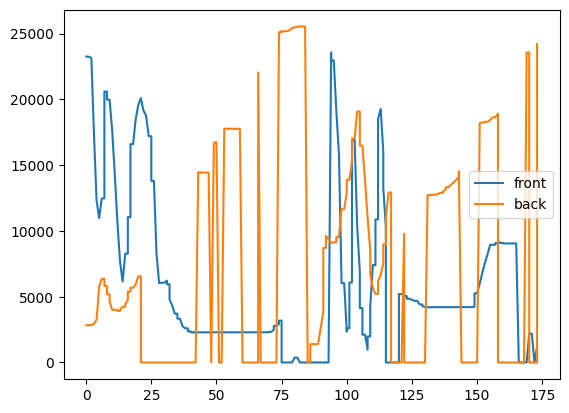

In [239]:
plt.plot(x,l1,label='front')
plt.plot(x,l2,label='back')

plt.legend()
plt.show()

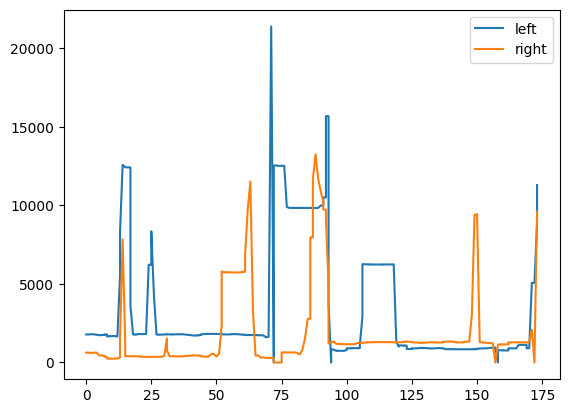

In [240]:
plt.plot(x,l3,label='left')
plt.plot(x,l4,label='right')

plt.legend()
plt.show()